In [18]:
%matplotlib inline
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, linewidth=75)

In [19]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
t_c

tensor([ 0.5000, 14.0000, 15.0000, 28.0000, 11.0000,  8.0000,  3.0000,
        -4.0000,  6.0000, 13.0000, 21.0000])

In [2]:
def model(t_u, w, b):
    return w * t_u + b

In [21]:
# 损失函数的选择异常重要，如果换一个思路把损失函数换成
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    print(squared_diffs)
    return squared_diffs.mean()
# def loss_fn(t_p, t_c):
#     return abs(t_p - t_c)


In [49]:
w = torch.ones(())
print(w)
b = torch.zeros(())
print(b)
# 通过torch 去生成多维的标量数据
t_p = model(t_u, 1, 0)
# t_p = model(t_u, w, b)
t_p

tensor(1.)
tensor(0.)


tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000,
        21.8000, 48.4000, 60.4000, 68.4000])

In [46]:
loss = loss_fn(t_p, t_c)
print(3**2)
loss

tensor([1239.0400, 1755.6101, 1866.2401, 2905.2102, 2052.0898, 1672.8102,
         954.8101,  665.6400, 1797.7601, 2246.7603, 2246.7603])
9


tensor(1763.8848)

In [47]:
x = torch.ones(())
y = torch.ones(3,1)
z = torch.ones(1,3)
a = torch.ones(2, 1, 1)
print(f"shapes: x: {x.shape}, y: {y.shape}")
print(f"        z: {z.shape}, a: {a.shape}")
print("x * y:", (x * y).shape)
print("y * z:", (y * z).shape)
print("y * z * a:", (y * z * a).shape)

shapes: x: torch.Size([]), y: torch.Size([3, 1])
        z: torch.Size([1, 3]), a: torch.Size([2, 1, 1])
x * y: torch.Size([3, 1])
y * z: torch.Size([3, 3])
y * z * a: torch.Size([2, 3, 3])


In [25]:
delta = 0.1

loss_rate_of_change_w = \
    (loss_fn(model(t_u, w + delta, b), t_c) - 
     loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)
print(loss_rate_of_change_w)

tensor([1503.1129, 2255.3003, 2402.9609, 3855.1687, 2593.8650, 2096.7246,
        1175.8042,  782.8804, 2231.6177, 2855.8337, 2941.9783])
tensor([1000.4570, 1318.4163, 1397.2645, 2089.4041, 1573.7087, 1296.7200,
         756.8001,  557.9044, 1410.7537, 1710.6497, 1645.1138])
tensor(4517.2974)


In [26]:
learning_rate = 1e-2

w = w - learning_rate * loss_rate_of_change_w

In [27]:
loss_rate_of_change_b = \
    (loss_fn(model(t_u, w, b + delta), t_c) - 
     loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)

b = b - learning_rate * loss_rate_of_change_b

tensor([ 2488112.7500,  6166129.0000,  6686191.5000, 13290884.0000,
         6239196.5000,  4700044.0000,  2251091.7500,   919433.1875,
         4596186.5000,  7187479.5000,  9255780.0000])
tensor([ 2488743.5000,  6167123.5000,  6687227.0000, 13292344.0000,
         6240196.5000,  4700912.0000,  2251691.7500,   919816.6875,
         4597045.0000,  7188553.0000,  9256998.0000])


In [28]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)  # <1>
    return dsq_diffs

In [29]:
def dmodel_dw(t_u, w, b):
    return t_u

In [30]:
def dmodel_db(t_u, w, b):
    return 1.0

In [31]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])  # <1>

In [32]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b)  # <1>
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)  # <2>

        params = params - learning_rate * grad

        print('Epoch %d, Loss %f' % (epoch, float(loss))) # <3>
            
    return params

In [33]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c,
                  print_params=True):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b)  # <1>
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)  # <2>

        params = params - learning_rate * grad

        if epoch in {1, 2, 3, 10, 11, 99, 100, 4000, 5000}:  # <3>
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            if print_params:
                print('    Params:', params)
                print('    Grad:  ', grad)
        if epoch in {4, 12, 101}:
            print('...')

        if not torch.isfinite(loss).all():
            break  # <3>
            
    return params

In [34]:
training_loop(
    n_epochs = 100, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_u, 
    t_c = t_c)

tensor([1239.0400, 1755.6101, 1866.2401, 2905.2102, 2052.0898, 1672.8102,
         954.8101,  665.6400, 1797.7601, 2246.7603, 2246.7603])
Epoch 1, Loss 1763.884766
    Params: tensor([-44.1730,  -0.8260])
    Grad:   tensor([4517.2964,   82.6000])
tensor([ 2491033.2500,  6170725.5000,  6690977.5000, 13297630.0000,
         6243820.0000,  4704057.0000,  2253870.2500,   921209.3125,
         4600155.5000,  7192441.5000,  9261411.0000])
Epoch 2, Loss 5802484.500000
    Params: tensor([2568.4011,   45.1637])
    Grad:   tensor([-261257.4062,   -4598.9702])
tensor([8.4156e+09, 2.0622e+10, 2.2354e+10, 4.4255e+10, 2.0919e+10,
        1.5783e+10, 7.5883e+09, 3.1405e+09, 1.5463e+10, 2.4076e+10,
        3.0871e+10])
Epoch 3, Loss 19408029696.000000
    Params: tensor([-148527.7344,   -2616.3931])
    Grad:   tensor([15109614.0000,   266155.6875])
tensor([2.8144e+13, 6.8979e+13, 7.4770e+13, 1.4804e+14, 6.9969e+13,
        5.2789e+13, 2.5379e+13, 1.0501e+13, 5.1716e+13, 8.0527e+13,
        1.0326e

tensor([-1.8590e+19, -3.2746e+17])

In [35]:
training_loop(
    n_epochs = 100, 
    learning_rate = 1e-4, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_u, 
    t_c = t_c)

tensor([1239.0400, 1755.6101, 1866.2401, 2905.2102, 2052.0898, 1672.8102,
         954.8101,  665.6400, 1797.7601, 2246.7603, 2246.7603])
Epoch 1, Loss 1763.884766
    Params: tensor([ 0.5483, -0.0083])
    Grad:   tensor([4517.2964,   82.6000])
tensor([363.4739, 276.8914, 285.6463, 285.4439, 394.3942, 353.5212,
        242.6773, 254.2122, 421.3998, 404.3023, 272.0334])
Epoch 2, Loss 323.090515
    Params: tensor([ 0.3623, -0.0118])
    Grad:   tensor([1859.5493,   35.7843])
tensor([154.3265,  38.9575,  36.9046,   2.7616,  88.1067,  94.1945,
         85.9451, 141.2921, 132.8078,  78.7126,  14.2169])
Epoch 3, Loss 78.929634
    Params: tensor([ 0.2858, -0.0135])
    Grad:   tensor([765.4666,  16.5122])
tensor([ 93.8661,   3.8455,   2.6187,  21.2431,  25.7586,  35.5288,
         44.5432, 104.3721,  61.1167,  18.0365,   2.1518])
...
tensor([7.3321e+01, 3.9535e-02, 4.6814e-02, 5.1702e+01, 1.0894e+01,
        1.9528e+01, 3.1417e+01, 9.0793e+01, 3.9588e+01, 5.4897e+00,
        1.3125e+01])
t

tensor([ 0.2327, -0.0438])

In [36]:
t_un = 0.1 * t_u

In [37]:
training_loop(
    n_epochs = 100, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_un, # <1>
    t_c = t_c)

tensor([9.4249e+00, 7.0728e+01, 8.4272e+01, 3.9244e+02, 2.8837e+01,
        9.6721e+00, 1.5210e-01, 3.8192e+01, 1.3456e+00, 4.8442e+01,
        2.0051e+02])
Epoch 1, Loss 80.364342
    Params: tensor([1.7761, 0.1064])
    Grad:   tensor([-77.6140, -10.6400])
tensor([ 35.3694,  15.7210,  20.7613, 178.1427,   0.7991,   0.6268,
          9.7814,  63.6546,   7.3058,   4.6903,  76.4715])
Epoch 2, Loss 37.574913
    Params: tensor([2.0848, 0.1303])
    Grad:   tensor([-30.8623,  -2.3864])
tensor([5.0025e+01, 4.9103e+00, 7.4880e+00, 1.1654e+02, 7.5253e-01,
        5.4045e+00, 1.7620e+01, 7.5256e+01, 1.7813e+01, 7.7153e-02,
        4.3692e+01])
Epoch 3, Loss 30.871077
    Params: tensor([2.2094, 0.1217])
    Grad:   tensor([-12.4631,   0.8587])
tensor([56.3883,  2.3342,  4.0790, 95.7146,  2.4354,  8.5592, 21.2661,
        79.8906, 23.1856,  0.2175, 33.2475])
...
tensor([58.8950,  1.5806,  3.0174, 87.9290,  3.3607,  9.9833, 22.7263,
        81.5529, 25.4677,  0.5783, 29.4873])
tensor([59.7940, 

tensor([ 2.7553, -2.5162])

In [38]:
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_un, 
    t_c = t_c,
    print_params = False)

params

tensor([9.4249e+00, 7.0728e+01, 8.4272e+01, 3.9244e+02, 2.8837e+01,
        9.6721e+00, 1.5210e-01, 3.8192e+01, 1.3456e+00, 4.8442e+01,
        2.0051e+02])
Epoch 1, Loss 80.364342
tensor([ 35.3694,  15.7210,  20.7613, 178.1427,   0.7991,   0.6268,
          9.7814,  63.6546,   7.3058,   4.6903,  76.4715])
Epoch 2, Loss 37.574913
tensor([5.0025e+01, 4.9103e+00, 7.4880e+00, 1.1654e+02, 7.5253e-01,
        5.4045e+00, 1.7620e+01, 7.5256e+01, 1.7813e+01, 7.7153e-02,
        4.3692e+01])
Epoch 3, Loss 30.871077
tensor([56.3883,  2.3342,  4.0790, 95.7146,  2.4354,  8.5592, 21.2661,
        79.8906, 23.1856,  0.2175, 33.2475])
...
tensor([58.8950,  1.5806,  3.0174, 87.9290,  3.3607,  9.9833, 22.7263,
        81.5529, 25.4677,  0.5783, 29.4873])
tensor([59.7940,  1.3248,  2.6418, 84.8081,  3.7653, 10.5579, 23.2449,
        82.0121, 26.3685,  0.7699, 28.0299])
tensor([60.0472,  1.2307,  2.4992, 83.4493,  3.9304, 10.7724, 23.3812,
        81.9939, 26.7004,  0.8549, 27.4274])
tensor([60.0448,  1

tensor([  5.3671, -17.3012])

In [25]:
%matplotlib inline
from matplotlib import pyplot as plt
print(*params)
t_p = model(t_un, *params)  # <1>

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy()) # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")  # bookskip

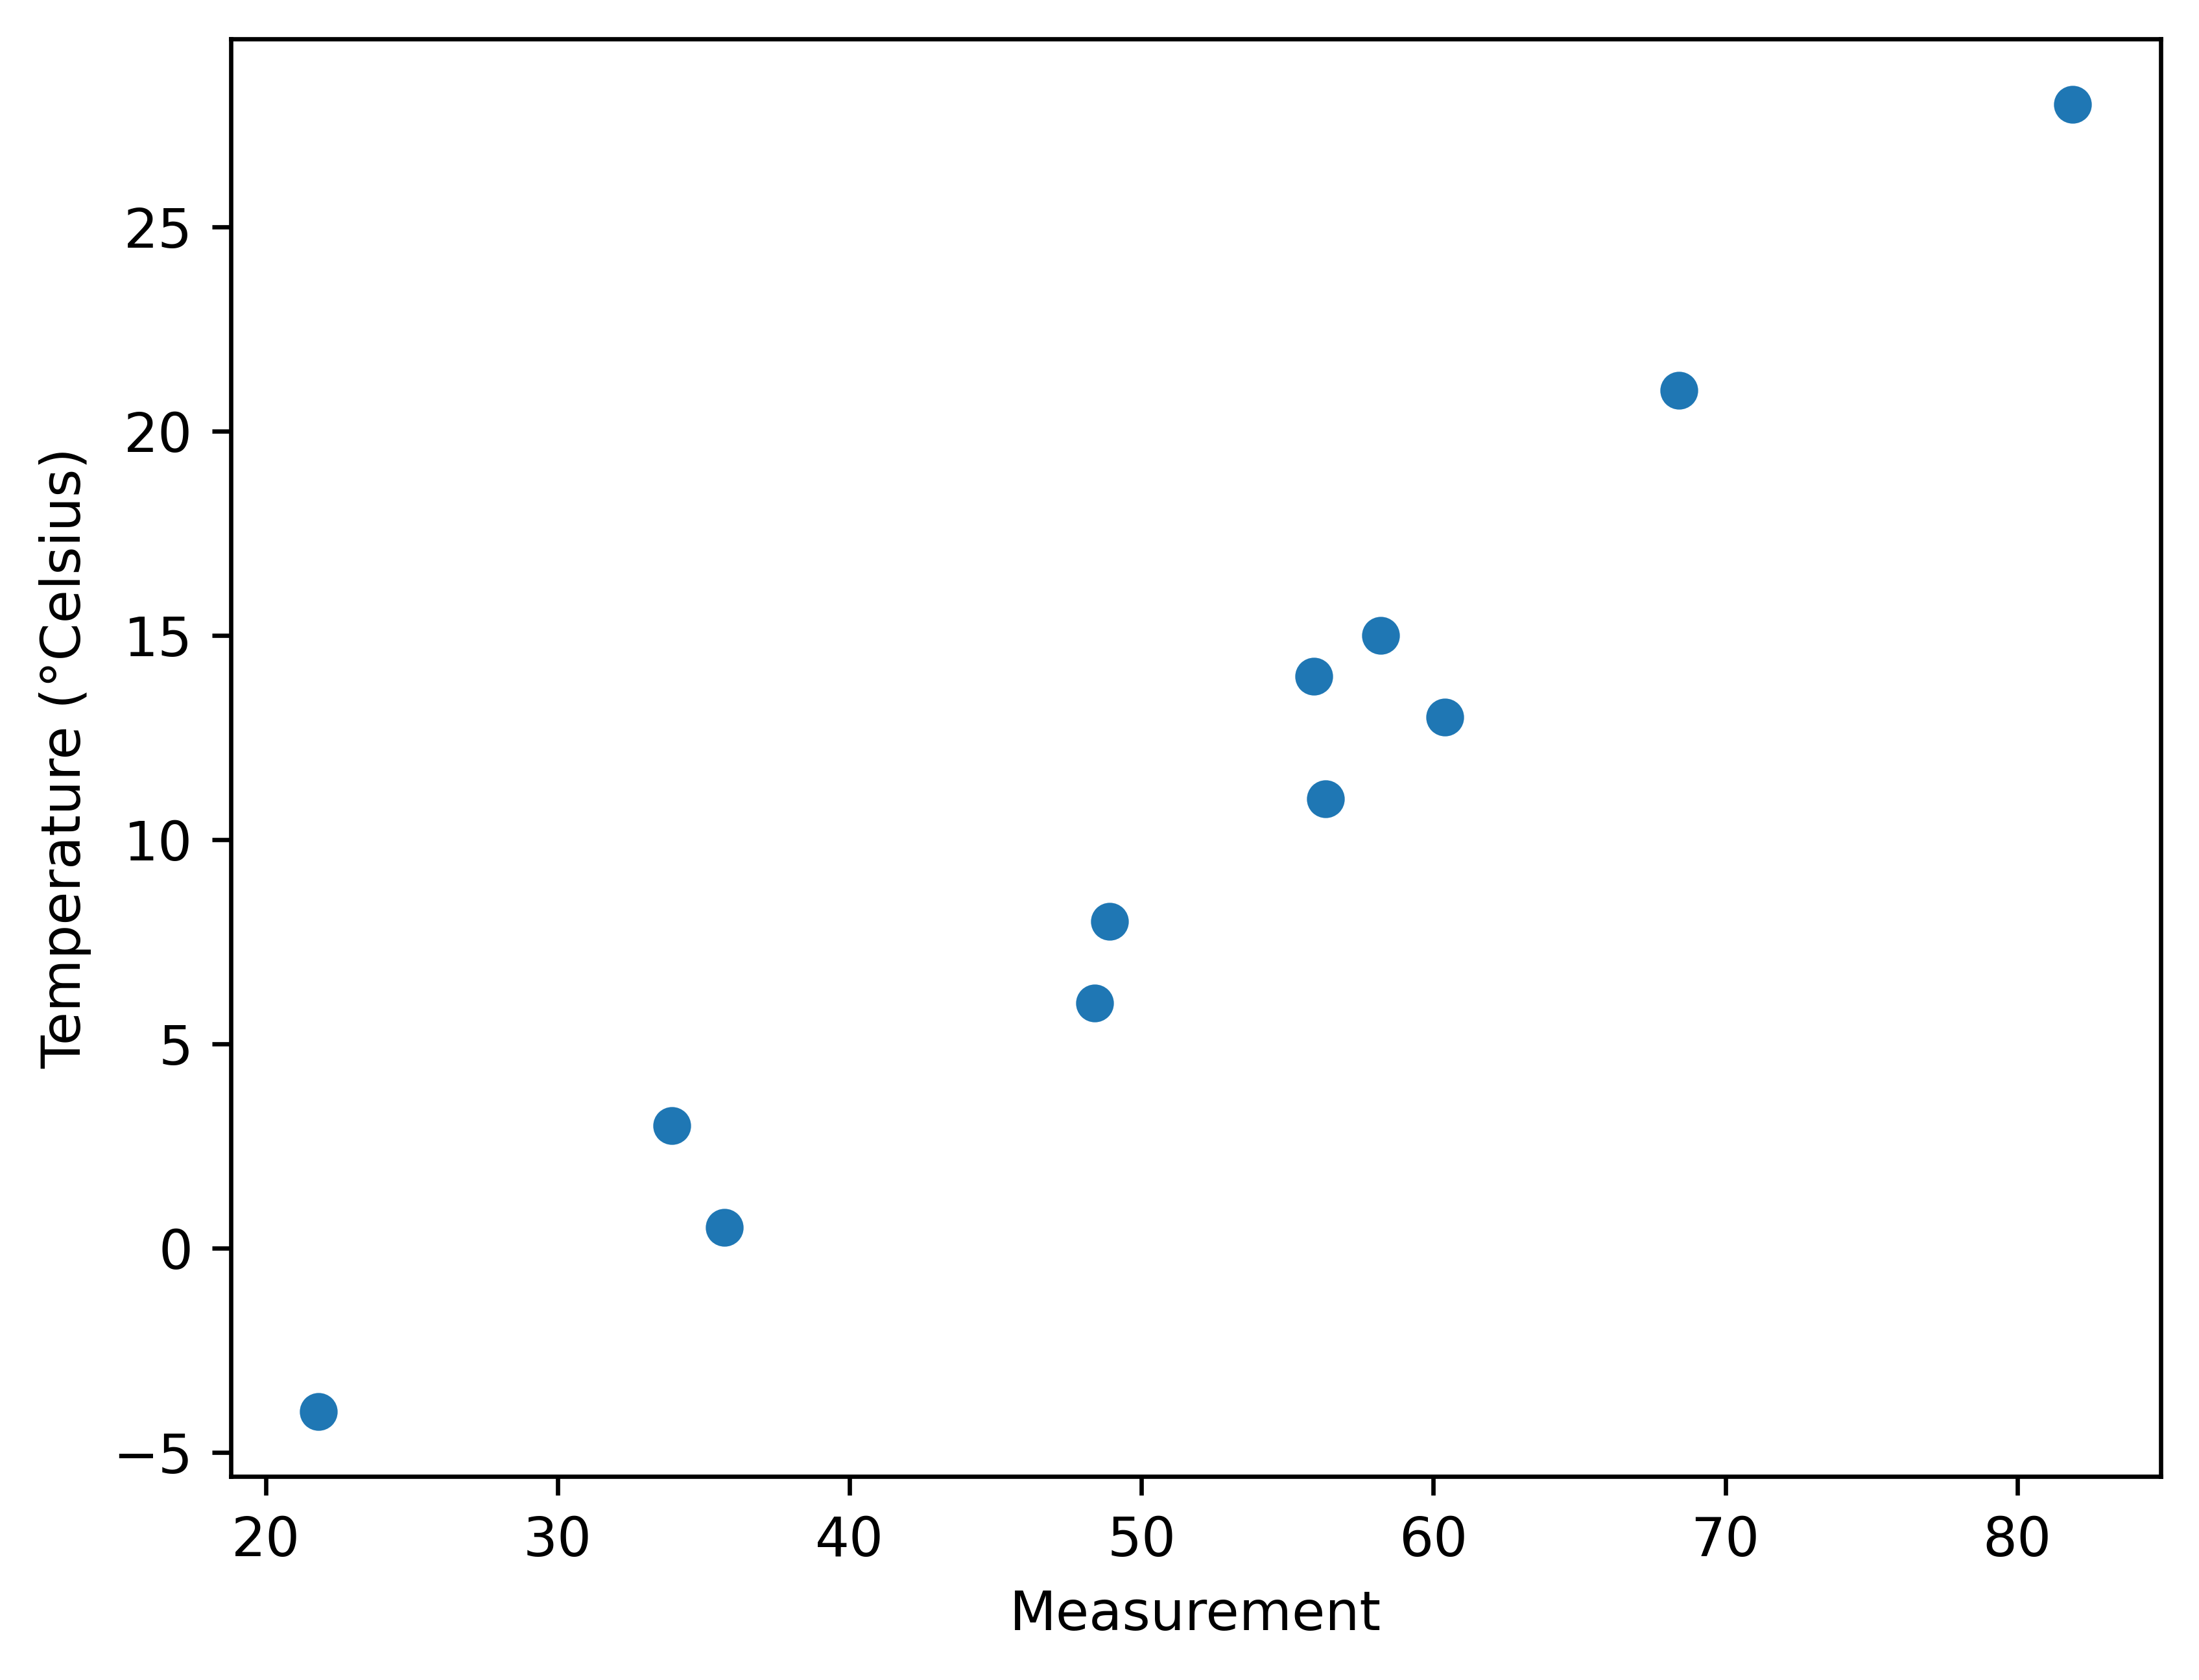

In [40]:
%matplotlib inline
from matplotlib import pyplot as plt

fig = plt.figure(dpi=600)
plt.xlabel("Measurement")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

plt.savefig("temp_data_plot.png", format="png")